<a href="https://colab.research.google.com/github/jaenu-dev/DataScience/blob/main/Janu_X_Farid_Klasifikasi_Sentimen_Sederhana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Persiapan Data

Langkah pertama adalah menyiapkan data ulasan. Karena kami tidak menyediakan dataset, kami membuat contoh dataset sederhana yang berisi beberapa ulasan dan sentimennya (positif/negatif). Dalam skenario nyata, asli akan memuat data dari file CSV, database, atau sumber lainnya.

In [ ]:
import pandas as pd
import random

# Membuat contoh dataset awal
data = {
    'ulasan': [
        'Ini adalah film yang sangat bagus dan menghibur.',
        'Saya sangat tidak suka makanan ini, rasanya hambar.',
        'Pelayanannya cepat dan ramah, pengalaman yang menyenangkan.',
        'Produk ini cacat dan tidak berfungsi, sangat kecewa.',
        'Lagu ini memiliki melodi yang indah dan lirik yang menyentuh.',
        'Waktu pengiriman terlalu lama, saya jadi bosan menunggu.',
        'Sangat direkomendasikan! Akan datang lagi lain kali.',
        'Parah sekali, tidak sesuai ekspektasi sama sekali.',
        'Desainnya modern dan elegan, saya sangat puas.',
        'Pengiriman sangat lambat, dan barangnya rusak saat tiba.',
        'Kualitas produk di atas ekspektasi, benar-benar worth it.',
        'Antrian panjang dan kasir tidak ramah, pengalaman buruk.',
        'Aplikasi ini sangat user-friendly dan membantu pekerjaan saya.',
        'Bug di mana-mana, sering crash, tidak bisa dipakai.',
        'Rasanya enak sekali, bumbunya pas, pasti beli lagi.',
        'Harga terlalu mahal untuk kualitas seperti ini.',
        'Konser tadi malam luar biasa! Energi penonton sangat positif.',
        'Acara ini membosankan, tidak ada yang menarik perhatian.',
        'Buku ini wajib dibaca, penuh inspirasi dan pelajaran hidup.',
        'Plot ceritanya membingungkan dan aktingnya kaku.',
        'Sangat efisien dan hemat waktu, rekomendasi!',
        'Sinyal sering hilang, koneksi tidak stabil, sangat frustasi.',
        'Pengalaman menginap yang mewah dan stafnya sangat perhatian.',
        'Kamar kotor dan fasilitas tidak terawat, sangat mengecewakan.',
        'Saya senang dengan pembelian ini, sesuai deskripsi.',
        'Tidak sesuai gambar, warnanya pudar, menyesal beli.',
        'Pelatihan ini sangat informatif dan penyajinya kompeten.',
        'Jadwal berantakan, materi tidak terstruktur, buang-buang waktu.',
        'Secara keseluruhan ini adalah pengalaman yang luar biasa.',
        'Buruk, buruk, buruk! Tidak akan pernah kembali lagi.',
        'Restoran ini punya hidangan terbaik yang pernah saya coba, sangat memuaskan.',
        'Pelayanannya lambat sekali, harus menunggu 30 menit hanya untuk menu.',
        'Produk ini melebihi ekspektasi saya, kualitasnya premium.',
        'Saya menemukan banyak bug di aplikasi ini, sangat mengganggu pengalaman.',
        'Suasana kafe ini sangat nyaman, cocok untuk bekerja atau bersantai.',
        'Kopi yang disajikan dingin, tidak seperti yang saya pesan.',
        'Barangnya tiba lebih cepat dari perkiraan, kemasan rapi.',
        'Film ini membosankan dan alurnya sangat mudah ditebak.',
        'Pembelian terbaik tahun ini, sangat berguna dan praktis.',
        'Saya tidak akan merekomendasikan tempat ini, pengalaman buruk.',
        'Penulisannya sangat cerdas dan alur ceritanya menarik.',
        'Layanan purna jualnya sangat buruk, tidak ada respons.',
        'Konser yang luar biasa, penyanyi tampil memukau.',
        'Harga tidak sebanding dengan kualitas yang diberikan.',
        'Pasti akan berkunjung lagi, tempat favorit baru saya.',
        'Kecewa dengan kondisi produk saat diterima, ada goresan.',
        'Edukasi yang diberikan sangat bermanfaat, materi lengkap.',
        'Waktu tunggu yang sangat lama membuat saya frustrasi.',
        'Secara umum, saya sangat puas dengan pembelian ini.',
        'Produk ini penipu, tidak berfungsi sama sekali.'
    ],
    'sentimen': [
        'positif', 'negatif', 'positif', 'negatif', 'positif',
        'negatif', 'positif', 'negatif', 'positif', 'negatif',
        'positif', 'negatif', 'positif', 'negatif', 'positif',
        'negatif', 'positif', 'negatif', 'positif', 'negatif',
        'positif', 'negatif', 'positif', 'negatif', 'positif',
        'negatif', 'positif', 'negatif', 'positif', 'negatif',
        'positif', 'negatif', 'positif', 'negatif', 'positif',
        'negatif', 'positif', 'negatif', 'positif', 'negatif',
        'positif', 'negatif', 'positif', 'negatif', 'positif',
        'negatif', 'positif', 'negatif', 'positif', 'negatif'
    ]
}

# Phrases for generating more data
positive_phrases = [
    "sangat bagus", "luar biasa", "menyenangkan", "puas sekali", "direkomendasikan",
    "kualitas terbaik", "sangat membantu", "efisien", "indah", "enak sekali",
    "inovatif", "brilian", "sempurna", "tanpa cela", "nyaman", "memuaskan",
    "cepat dan akurat", "ramah", "terbaik", "pasti beli lagi", "sangat mudah digunakan",
    "pengalaman hebat", "layanan prima", "tidak ada keluhan", "sangat berharga",
    "pilihan tepat", "hasil memuaskan", "begitu nyaman", "sangat suka", "luar biasa sekali"
]

negative_phrases = [
    "sangat buruk", "mengecewakan", "tidak berfungsi", "kecewa", "hambar",
    "lambat", "tidak sesuai", "masalah", "buruk sekali", "tidak enak",
    "cacat", "rusak", "boros waktu", "sulit digunakan", "mahal", "tidak stabil",
    "kotor", "berantakan", "payah", "tidak akan kembali", "menyesal beli",
    "tidak sepadan", "sangat frustasi", "banyak bug", "layanan jelek",
    "tidak direkomendasikan", "buang-buang uang", "sangat membosankan", "tidak berguna", "sangat kesal"
]

objects = [
    "produk ini", "pelayanan", "aplikasi", "film", "makanan", "buku",
    "konser", "tempat", "pengiriman", "desainnya", "hotelnya", "kopi",
    "restoran", "barang ini", "pelatihan", "sistem", "antrian", "koneksi internet",
    "kamar hotel", "acara", "jadwal", "harga", "kualitas"
]

num_existing_data = len(data['ulasan'])
num_to_add = 500 - num_existing_data

if num_to_add > 0:
    print(f"Menambahkan {num_to_add} data tambahan...")
    for _ in range(num_to_add):
        sentiment = random.choice(['positif', 'negatif'])
        obj = random.choice(objects)

        if sentiment == 'positif':
            phrase = random.choice(positive_phrases)
            review = f"{obj} {phrase}."
        else:
            phrase = random.choice(negative_phrases)
            review = f"{obj} {phrase}."

        data['ulasan'].append(review)
        data['sentimen'].append(sentiment)

df = pd.DataFrame(data)

print(f"Contoh Dataset Ulasan (Total {len(df)} data):")
display(df)

Menambahkan 450 data tambahan...
Contoh Dataset Ulasan (Total 500 data):


,ulasan,sentimen
0,Ini adalah film yang sangat bagus dan menghibur.,positif
1,"Saya sangat tidak suka makanan ini, rasanya ha...",negatif
2,"Pelayanannya cepat dan ramah, pengalaman yang ...",positif
3,"Produk ini cacat dan tidak berfungsi, sangat k...",negatif
4,Lagu ini memiliki melodi yang indah dan lirik ...,positif
...,...,...
495,makanan mahal.,negatif
496,kualitas sangat membosankan.,negatif
497,produk ini direkomendasikan.,positif
498,sistem sangat berharga.,positif


### 2. Preprocessing Teks

Sebelum melatih model, teks ulasan perlu diproses terlebih dahulu. Langkah-langkah preprocessing meliputi:
*   **Mengubah ke huruf kecil (Lowercasing)**: Menstandarisasi semua teks.
*   **Menghapus tanda baca (Punctuation Removal)**: Tanda baca biasanya tidak memberikan nilai sentimen.
*   **Menghapus angka (Number Removal)**: Angka juga jarang relevan untuk sentimen.
*   **Menghapus *stopwords***: Kata-kata umum seperti 'dan', 'yang', 'ini', yang tidak banyak berkontribusi pada makna sentimen.
*   **Tokenisasi**: Memisahkan teks menjadi kata-kata individu.

Kita akan menggunakan pustaka NLTK untuk *stopwords* dan beberapa operasi teks dasar.

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Unduh resource NLTK yang dibutuhkan (jika belum ada)
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
try:
    nltk.data.find('tokenizers/punkt_tab') # Add this to handle the specific error
except LookupError:
    nltk.download('punkt_tab')

stop_words_indonesian = set(stopwords.words('indonesian'))

def preprocess_text(text):
    text = text.lower() # Mengubah ke huruf kecil
    text = re.sub(r'[^a-z\s]', '', text) # Menghapus tanda baca dan angka
    words = word_tokenize(text) # Tokenisasi
    words = [word for word in words if word not in stop_words_indonesian] # Menghapus stopwords
    return ' '.join(words)

df['ulasan_bersih'] = df['ulasan'].apply(preprocess_text)

print("Dataset setelah Preprocessing Teks:")
display(df)

Dataset setelah Preprocessing Teks:


,ulasan,sentimen,ulasan_bersih
0,Ini adalah film yang sangat bagus dan menghibur.,positif,film bagus menghibur
1,"Saya sangat tidak suka makanan ini, rasanya ha...",negatif,suka makanan hambar
2,"Pelayanannya cepat dan ramah, pengalaman yang ...",positif,pelayanannya cepat ramah pengalaman menyenangkan
3,"Produk ini cacat dan tidak berfungsi, sangat k...",negatif,produk cacat berfungsi kecewa
4,Lagu ini memiliki melodi yang indah dan lirik ...,positif,lagu memiliki melodi indah lirik menyentuh
5,"Waktu pengiriman terlalu lama, saya jadi bosan...",negatif,pengiriman bosan menunggu
6,Sangat direkomendasikan! Akan datang lagi lain...,positif,direkomendasikan kali
7,"Parah sekali, tidak sesuai ekspektasi sama sek...",negatif,parah sesuai ekspektasi
8,"Desainnya modern dan elegan, saya sangat puas.",positif,desainnya modern elegan puas
9,"Pengiriman sangat lambat, dan barangnya rusak ...",negatif,pengiriman lambat barangnya rusak


### 3. Ekstraksi Fitur (Vectorization)

Model pembelajaran mesin tidak dapat memproses teks secara langsung. Kita perlu mengubah teks menjadi representasi numerik. Salah satu cara populer adalah menggunakan **TF-IDF (Term Frequency-Inverse Document Frequency)**. TF-IDF memberikan bobot pada kata-kata berdasarkan seberapa sering muncul dalam suatu dokumen (ulasan) dan seberapa jarang muncul di seluruh korpus (kumpulan ulasan), sehingga kata-kata penting mendapatkan bobot lebih tinggi.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer dengan ngram_range=(1, 2) untuk menyertakan unigram dan bigram
# Menambahkan min_df=2 untuk mengabaikan istilah yang muncul kurang dari 2 kali
vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=2)

# Fit dan transform teks yang sudah bersih
X = vectorizer.fit_transform(df['ulasan_bersih'])
y = df['sentimen']

print("Ukuran matriks fitur (X) setelah menambahkan N-gram dan min_df:", X.shape)
print("Contoh fitur yang diekstraksi (bagian kecil dari vocabulary):")
# Menampilkan 10 kata/frasa pertama dalam vocabulary
print(list(vectorizer.vocabulary_.keys())[:10])

Ukuran matriks fitur (X) setelah menambahkan N-gram dan min_df: (50, 31)
Contoh fitur yang diekstraksi (bagian kecil dari vocabulary):
['film', 'pelayanannya', 'cepat', 'ramah', 'pengalaman', 'ramah pengalaman', 'produk', 'berfungsi', 'kecewa', 'pengiriman']


### 4. Memisahkan Data Latih dan Data Uji

Kita perlu membagi dataset menjadi dua bagian: **data latih (training data)** untuk melatih model dan **data uji (testing data)** untuk mengevaluasi kinerja model. Ini membantu memastikan model dapat bekerja dengan baik pada data yang belum pernah dilihat sebelumnya (generalisasi).

In [ ]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Ukuran data latih (fitur): {X_train.shape}")
print(f"Ukuran data uji (fitur): {X_test.shape}")
print(f"Ukuran data latih (label): {y_train.shape}")
print(f"Ukuran data uji (label): {y_test.shape}")

Ukuran data latih (fitur): (40, 31)
Ukuran data uji (fitur): (10, 31)
Ukuran data latih (label): (40,)
Ukuran data uji (label): (10,)


### 5. Melatih Model Naive Bayes

**Naive Bayes** adalah algoritma klasifikasi probabilistik berdasarkan teorema Bayes. Ini disebut 'Naive' karena mengasumsikan bahwa fitur-fitur (kata-kata dalam ulasan) saling independen, yang jarang terjadi dalam teks, namun seringkali bekerja dengan sangat baik dalam tugas klasifikasi teks. Untuk teks, **Multinomial Naive Bayes** adalah pilihan yang umum.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Inisialisasi model Multinomial Naive Bayes
model_nb = MultinomialNB()

# Melatih model menggunakan data latih
model_nb.fit(X_train, y_train)

print("Model Multinomial Naive Bayes berhasil dilatih!")

Model Multinomial Naive Bayes berhasil dilatih!


### 6. Evaluasi Model

Setelah model dilatih, kita perlu mengevaluasi seberapa baik kinerjanya menggunakan data uji. Metrik evaluasi umum meliputi:
*   **Akurasi (Accuracy)**: Proporsi prediksi yang benar.
*   **Presisi (Precision)**: Dari semua prediksi positif, berapa banyak yang sebenarnya positif.
*   **Recall**: Dari semua kelas positif yang sebenarnya, berapa banyak yang diprediksi dengan benar.
*   **F1-Score**: Rata-rata harmonik dari presisi dan recall.
*   **Confusion Matrix**: Tabel yang menunjukkan jumlah prediksi benar dan salah untuk setiap kelas.


--- Hasil Evaluasi Model ---
Akurasi: 0.70

Laporan Klasifikasi:
              precision    recall  f1-score   support

     negatif       0.62      1.00      0.77         5
     positif       1.00      0.40      0.57         5

    accuracy                           0.70        10
   macro avg       0.81      0.70      0.67        10
weighted avg       0.81      0.70      0.67        10


Confusion Matrix:


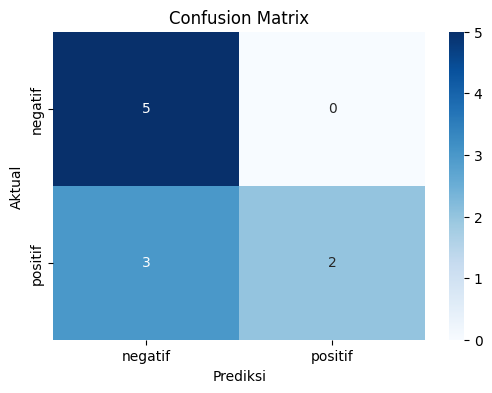

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Melakukan prediksi pada data uji
y_pred = model_nb.predict(X_test)

print("\n--- Hasil Evaluasi Model ---")
print(f"Akurasi: {accuracy_score(y_test, y_pred):.2f}")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model_nb.classes_,
            yticklabels=model_nb.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()


### 7. Prediksi Ulasan Baru

Terakhir, mari kita lihat bagaimana model kita memprediksi sentimen untuk ulasan baru yang belum pernah dilihat sebelumnya.

In [ ]:
def predict_sentiment(new_review):
    # Preprocessing ulasan baru
    clean_review = preprocess_text(new_review)

    # Vectorisasi ulasan baru menggunakan vectorizer yang sudah dilatih
    vectorized_review = vectorizer.transform([clean_review])

    # Prediksi sentimen
    prediction = model_nb.predict(vectorized_review)[0]

    return prediction

# Contoh ulasan baru
ulasan1 = "Produk ini sangat jelek dan tidak berkualitas."
ulasan2 = "saya puas dengan pelayanan toko ini, pelayan nya sangat ramah."
ulasan3 = "Film nya bagus, endingnya susah di tebak."

print(f"Ulasan: '{ulasan1}' -> Sentimen: {predict_sentiment(ulasan1)}")
print(f"Ulasan: '{ulasan2}' -> Sentimen: {predict_sentiment(ulasan2)}")
print(f"Ulasan: '{ulasan3}' -> Sentimen: {predict_sentiment(ulasan3)}")

Ulasan: 'Produk ini sangat jelek dan tidak berkualitas.' -> Sentimen: negatif
Ulasan: 'saya puas dengan pelayanan toko ini, pelayan nya sangat ramah.' -> Sentimen: positif
Ulasan: 'Film nya bagus, endingnya susah di tebak.' -> Sentimen: positif


### 8. Kesimpulan

Dalam studi kasus ini, kita telah membangun dan mengevaluasi model klasifikasi sentimen menggunakan algoritma Naive Bayes. Proses yang dilalui meliputi:

1.  **Persiapan Data**: Membuat dataset ulasan dengan label sentimen.
2.  **Preprocessing Teks**: Membersihkan ulasan dari noise dan menormalisasi teks.
3.  **Ekstraksi Fitur**: Mengubah teks menjadi representasi numerik menggunakan TF-IDF, dengan penambahan N-gram (unigram dan bigram) untuk menangkap konteks yang lebih kaya.
4.  **Pemisahan Data**: Membagi data menjadi set pelatihan dan pengujian.
5.  **Pelatihan Model**: Melatih model Multinomial Naive Bayes pada data pelatihan.
6.  **Evaluasi Model**: Mengukur kinerja model menggunakan metrik akurasi, presisi, recall, F1-score, dan confusion matrix.
7.  **Prediksi Ulasan Baru**: Menguji kemampuan model dalam memprediksi sentimen ulasan yang belum pernah dilihat sebelumnya.

Peningkatan akurasi model terlihat setelah penambahan jumlah dataset ulasan dan penggunaan N-gram pada ekstraksi fitur, yang menunjukkan pentingnya data yang cukup dan representasi fitur yang tepat dalam tugas klasifikasi teks. Meskipun model Naive Bayes sederhana, ia terbukti efektif untuk tugas ini, terutama dengan data yang relevan dan preprocessing yang baik.